In [89]:
import pandas as pd
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dtflowers = pd.read_csv("/Machine Learning/Data/IRIS.csv")
#se muestra el dataframe
dtflowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
#Se reemplazará el valor de las especies de flores, donde 0 corresponde a setosa, 1 a virginica y 2 a versicolor
dtflowers=dtflowers.replace(to_replace ="Iris-setosa", value ="0")
dtflowers=dtflowers.replace(to_replace ="Iris-virginica", value ="1")
dtflowers=dtflowers.replace(to_replace ="Iris-versicolor", value ="2")

In [91]:
#permite mostrar el nombre de las columnas 
col_names=dtflowers.columns
col_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [92]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dtflowers.columns=dtflowers.columns.str.strip()

In [93]:
#Se renombra la columna specie por target_class, las demás columnas quedan iguales.
dtflowers.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target_class']

In [94]:
#Se muestran las columnas con los nombres actualizados.
dtflowers.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
#Se visualizan el número de especies por cada clase de flores
dtflowers['target_class'].value_counts()

0    50
2    50
1    50
Name: target_class, dtype: int64

In [96]:
#Permite viusalizar información del dataframe
dtflowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [97]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dtflowers.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [98]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dtflowers.drop('target_class', axis='columns')
mytarget_y=dtflowers['target_class']

In [99]:
#Variables independientes
inputs_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [100]:
#Se viualiza la variable dependiente
mytarget_y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target_class, Length: 150, dtype: object

In [101]:
#A continuación se introducirán los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_X, mytarget_y, test_size = 0.2, random_state = 20)

In [102]:
#Visualiza los datos de entrenamiento y el número de variables involucradas 
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [103]:
len(X_test)

30

In [104]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)


RandomForestClassifier()

In [105]:
#Visualiza el porcentaje de precisión del modelo
model.score(X_test,y_test)

0.9

In [106]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array(['0', '2', '2', '2', '2', '2', '1', '0', '1', '0', '1', '2', '2',
       '0', '0', '1', '0', '2', '1', '2', '2', '1', '1', '0', '2', '2',
       '2', '0', '1', '2'], dtype=object)

In [107]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[ 8,  0,  0],
       [ 0,  8,  3],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

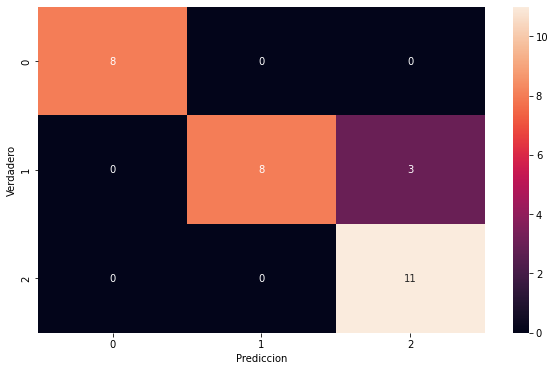

In [108]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [109]:
#Se prueba el model ode predicción con datos suministrados por el usuario
y_predicted = model.predict([[3.7,3.4,3.7,1.2]])
y_predicted


array(['2'], dtype=object)

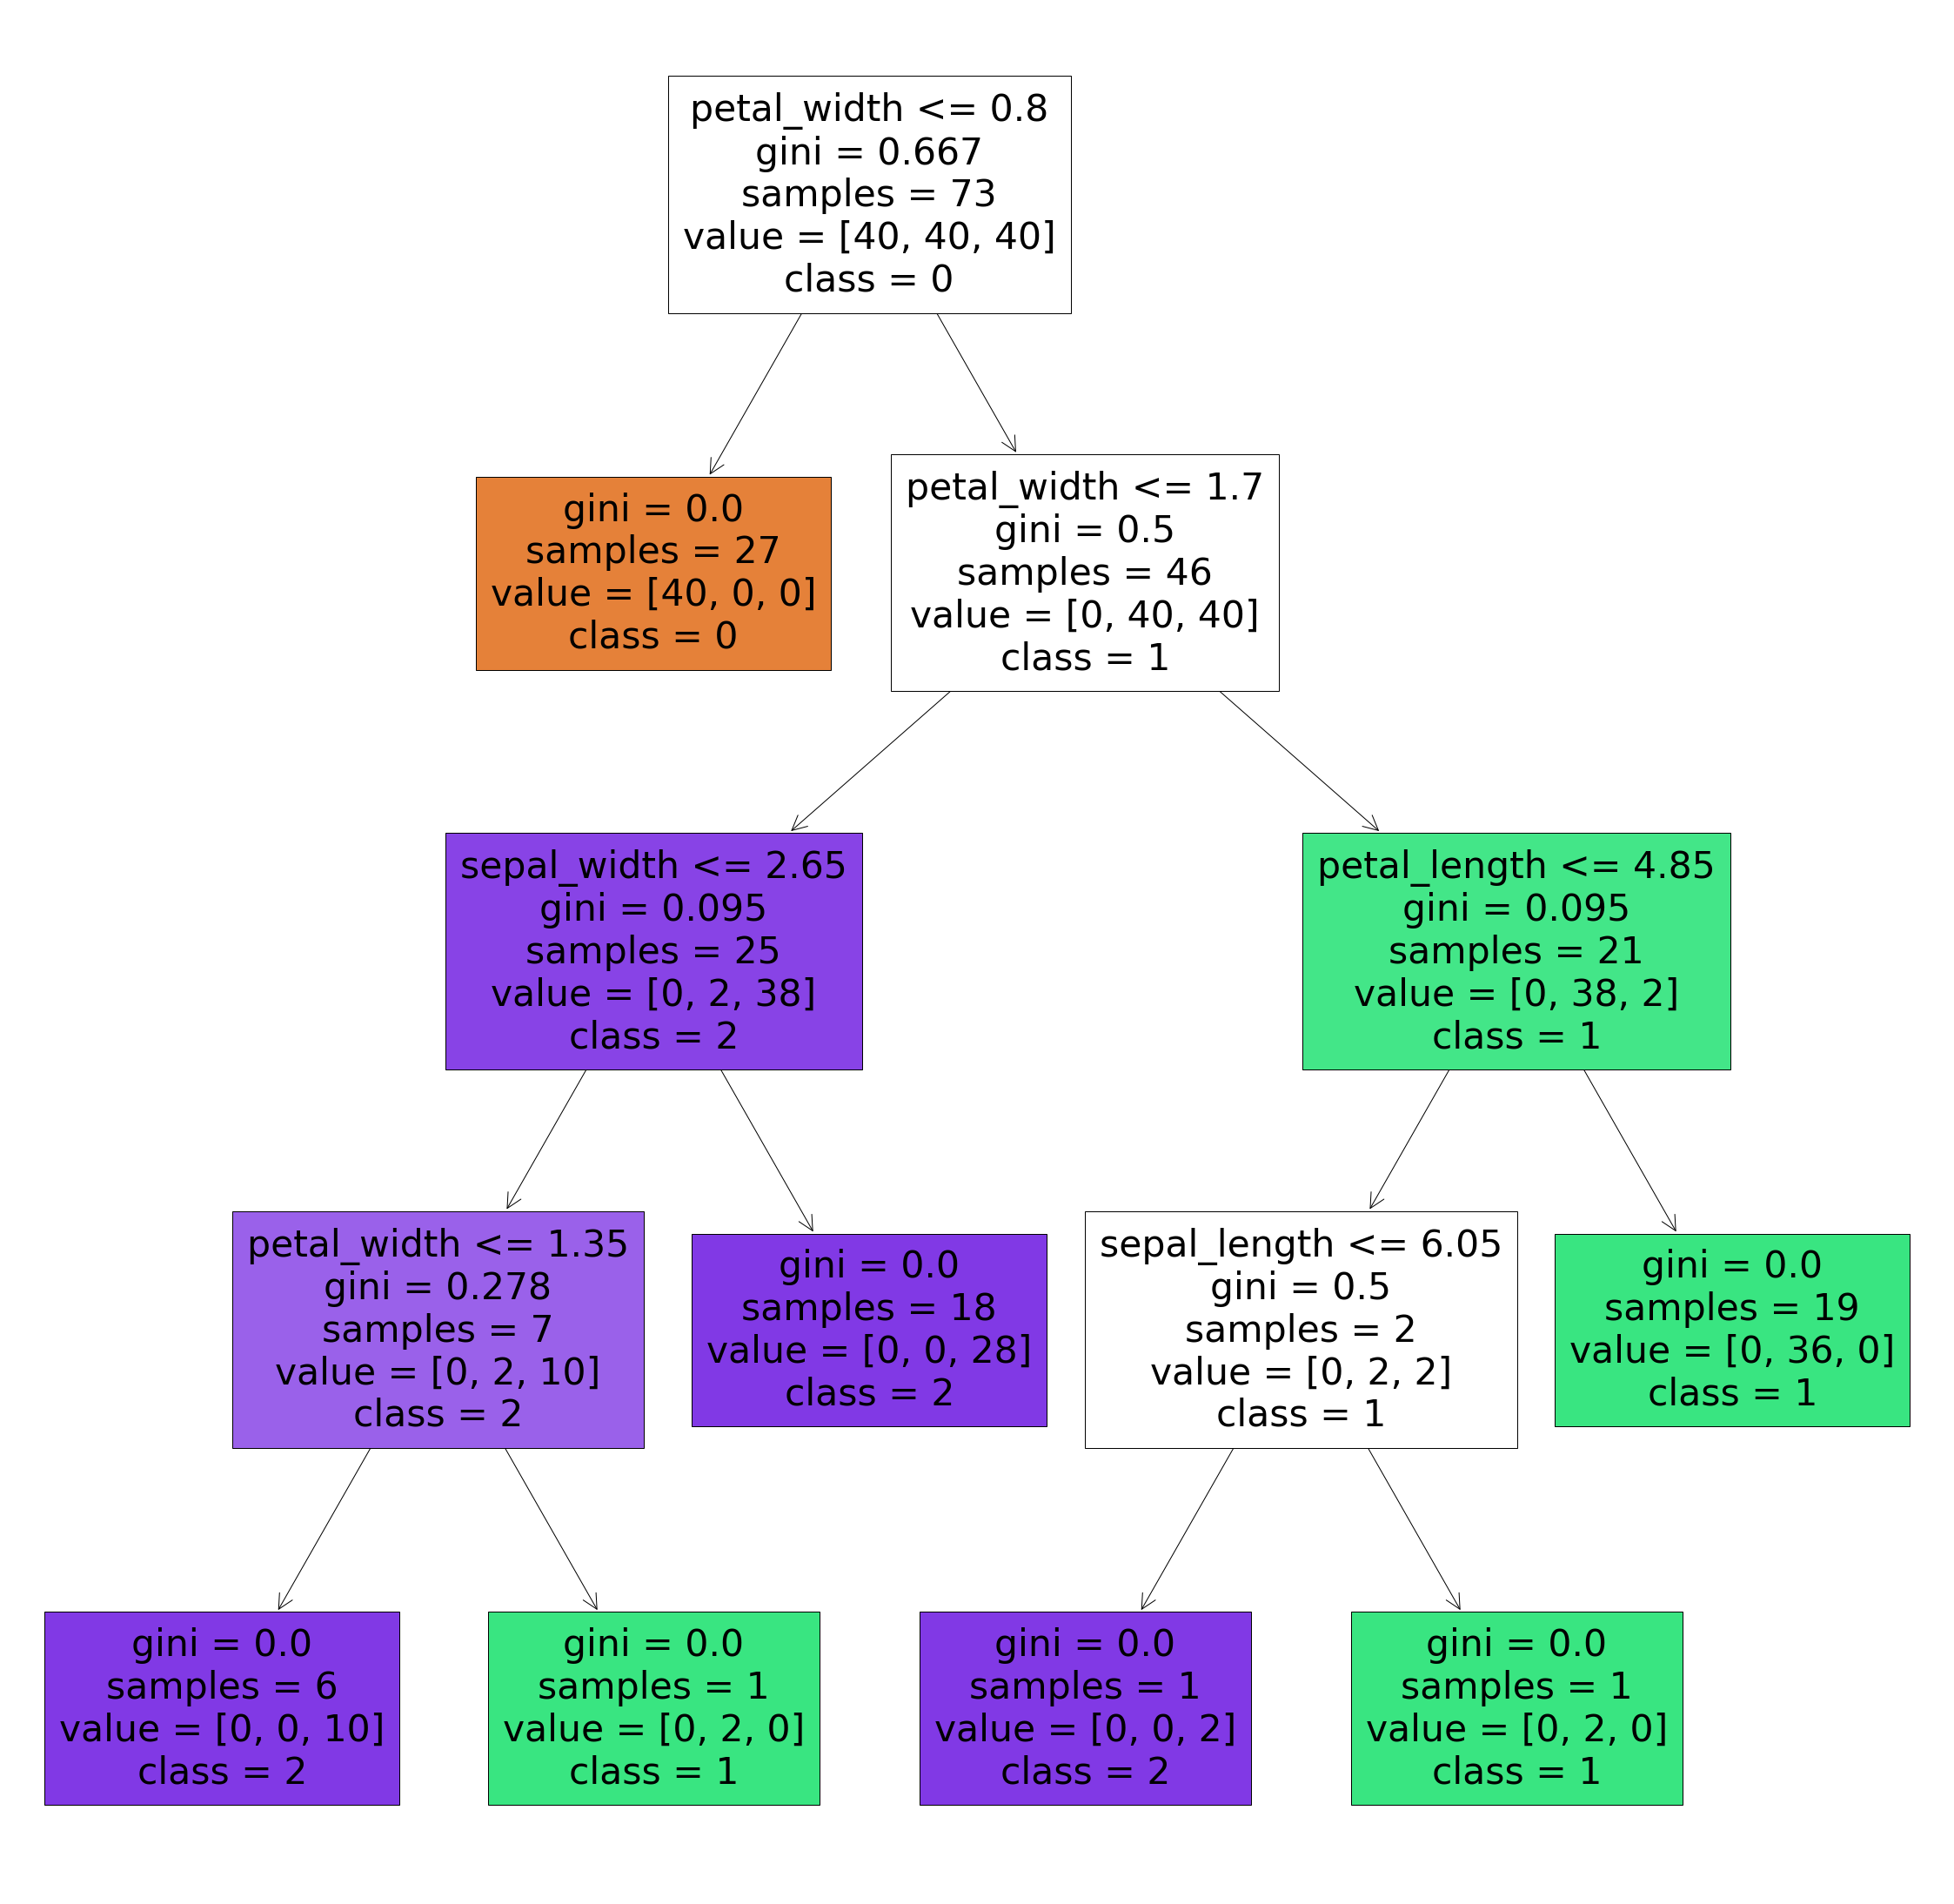

In [110]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[5], feature_names = X_train.columns,class_names=["0", "1","2"],filled=True);